# 📈 Time Series & Time Series Forecasting

## What is a Time Series?

A **time series** is a sequence of data points recorded at specific time intervals. The data is collected over time and typically measured at uniform intervals (e.g., daily, monthly, yearly).

### Examples:
- Daily stock prices of a company  
- Monthly rainfall in a city  
- Yearly GDP of a country  
- Hourly temperature readings  

### Key Features:
- **Temporal ordering**: Data points are in time order  
- **Frequency**: The time interval between observations (e.g., hourly, daily)  
- **Trend**: Long-term increase or decrease in the data  
- **Seasonality**: Repeating patterns or cycles over time  
- **Noise**: Random variation or fluctuations  

---

## What is Time Series Forecasting?

**Time Series Forecasting** is the process of using historical time series data to predict future values. It involves identifying patterns such as trends and seasonality to make informed predictions.

### Common Forecasting Techniques:
- **ARIMA (AutoRegressive Integrated Moving Average)**  
- **Exponential Smoothing (ETS)**  
- **Prophet (developed by Facebook)**  
- **LSTM (Long Short-Term Memory) – Deep Learning-based**  
- **SARIMA – Seasonal ARIMA**  

---

## Why Use Time Series Forecasting?

- Predict stock prices or sales  
- Forecast electricity or water demand  
- Anticipate traffic flow  
- Plan resources in advance  

---

## Important Concepts in Time Series:

- **Stationarity**: Statistical properties (mean, variance) remain constant over time  
- **Autocorrelation**: Correlation of a time series with its past values  
- **Lag**: A shifted version of the series used in modeling  

---

## Visualization Tips:
- Use **line plots** to view trends  
- Use **seasonal decomposition** to observe trend, seasonality, and residuals  
- Use **ACF/PACF plots** to check autocorrelation  


# Stock Market Data Scraping in python

In [2]:
# import libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import timedelta, date
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
date.today()

datetime.date(2025, 5, 26)

In [4]:
# Define the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365*1)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print(f'Data range: {start_date, end_date}')

Data range: ('2024-05-26', '2025-05-26')


In [5]:
# define the ticker
ticker = 'GOOGL'
df = yf.download(ticker, start=start_date, end=end_date, progress=False)

YF.download() has changed argument auto_adjust default to True


In [6]:
df.head(5)

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2024-05-28,175.560654,176.426524,173.540314,173.619935,20572200
2024-05-29,175.063019,175.998548,173.888641,174.595254,23388700
2024-05-30,171.291061,174.386264,170.972577,174.366355,22958700
2024-05-31,171.679199,172.236532,168.633762,171.042245,37638900
2024-06-03,172.346024,173.699553,170.345593,171.719016,27459100


In [7]:
df['Date'] = df.index   
df = df.reset_index(drop=True)
df = df.rename(columns={'Date': 'date'})
df = df[['date', 'Open', 'High', 'Low', 'Close', 'Volume']]

df.columns = df.columns.get_level_values(0)

In [8]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    249 non-null    datetime64[ns]
 1   Open    249 non-null    float64       
 2   High    249 non-null    float64       
 3   Low     249 non-null    float64       
 4   Close   249 non-null    float64       
 5   Volume  249 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


Price,date,Open,High,Low,Close,Volume
0,2024-05-28,173.619935,176.426524,173.540314,175.560654,20572200
1,2024-05-29,174.595254,175.998548,173.888641,175.063019,23388700
2,2024-05-30,174.366355,174.386264,170.972577,171.291061,22958700
3,2024-05-31,171.042245,172.236532,168.633762,171.679199,37638900
4,2024-06-03,171.719016,173.699553,170.345593,172.346024,27459100


In [9]:
# Select Columns
df = df[['date', 'Close']]
df.head()

Price,date,Close
0,2024-05-28,175.560654
1,2024-05-29,175.063019
2,2024-05-30,171.291061
3,2024-05-31,171.679199
4,2024-06-03,172.346024


In [10]:
# Plot the data to see how it looks
fig = px.line(df, x='date', y='Close', title='Google Stock Price')
fig.update_layout(xaxis_title='Date', yaxis_title='Close Price ($)')
fig.show()

In [11]:
# lets check for stationarity
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Data is stationary.")
    else:
        print("Data is non-stationary.")
adf_test(df['Close'])

ADF Statistic: -2.0274426103242638
p-value: 0.27467158381596113
Critical Values:
   1%: -3.4569962781990573
   5%: -2.8732659015936024
   10%: -2.573018897632674
Data is non-stationary.


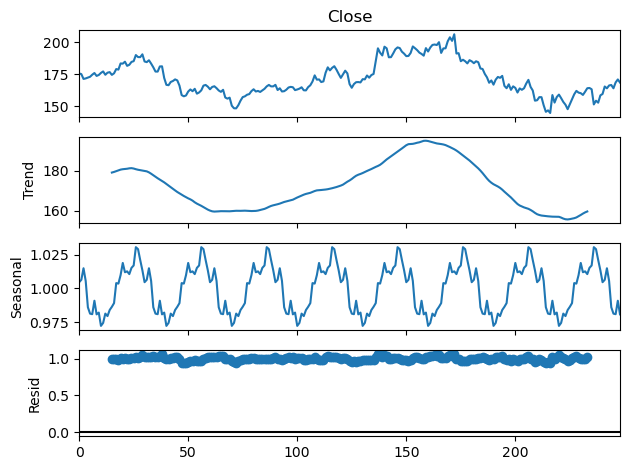

In [12]:
# Decompose the data
result = seasonal_decompose(df['Close'], model='multiplicative', period=30)
result.plot()
plt.show()

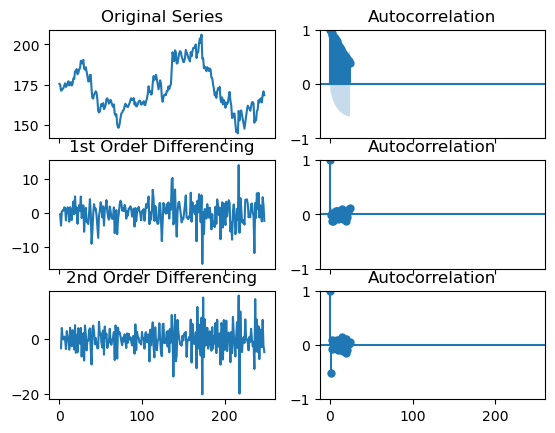

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

`d=1`

In [14]:
# Let's find p value 
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
# pd.plotting.autocorrelation_plot(df['Close'])
# plot_acf(df['Close'], alpha=0.05 )
from statsmodels.tsa.stattools import acf, pacf 
x_acf = pd.DataFrame(acf(df['Close'], nlags=30))
x_acf

,0
0,1.000000
1,0.966872
2,0.934417
3,0.900493
4,0.874467
5,0.856768
6,0.838274
7,0.816494
8,0.790915
9,0.761324


`P=2`

# Lets find q value

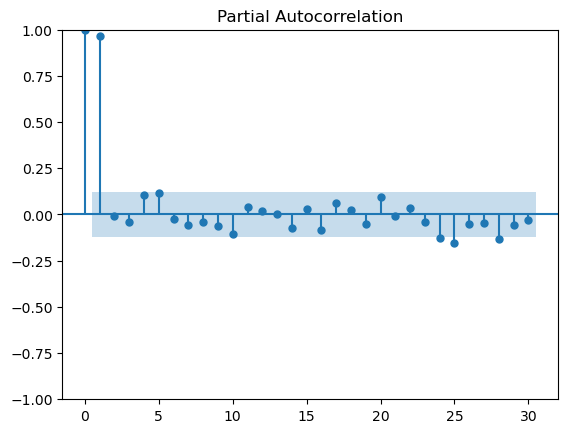

In [15]:
# Partial Autocorrelation 
plot_pacf(df['Close'], lags=30, alpha=0.05, method='ywm')
plt.show()

`q=2`

p = 2, 
d = 1, 
q = 2 

In [16]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [17]:
# lets run arima with pmdarima
from pmdarima import auto_arima

model = auto_arima(df['Close'],
                   start_p=1, start_q=1,
                   max_p=3, max_q=3, m=12,
                   seasonal=True, d=None, D=1,
                   trace=True, error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1290.923, Time=1.79 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1801.073, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1339.356, Time=0.68 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1611.681, Time=0.76 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1799.707, Time=0.04 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1341.207, Time=1.15 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=4.28 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=4.60 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1429.522, Time=0.20 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=1291.281, Time=3.44 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1321.314, Time=2.42 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=6.90 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1608.697, Time=1.33 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : 

In [18]:
model = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  249
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -656.988
Date:                Mon, 26 May 2025   AIC                           1319.976
Time:                        10:07:09   BIC                           1330.528
Sample:                             0   HQIC                          1324.223
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.2049      2.248      2.760      0.006       1.798      10.612
ar.L1          0.9639      0.013     74.586      0.000       0.939       0.989
sigma2        11.3418      0.715     15.864      0.0

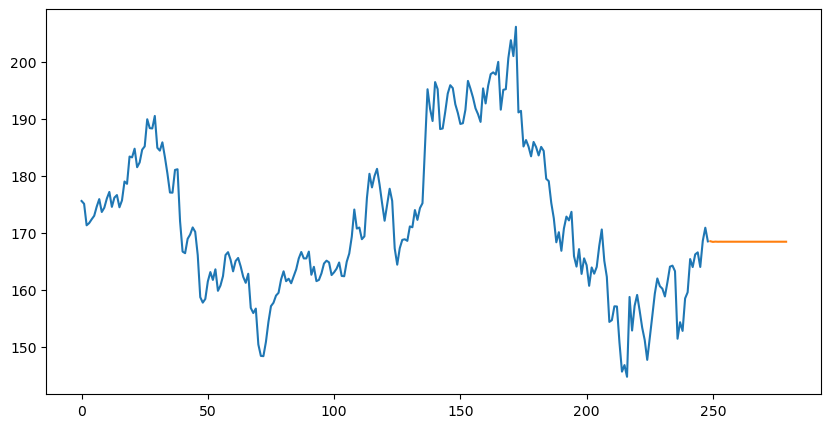

In [21]:
# statsmodels  arima
from statsmodels.tsa.arima.model import ARIMA   
p, d, q = 2, 1, 1
model = ARIMA(df['Close'], order=(p, d, q))
model = model.fit()
# print(model.summary())

# predict next 30 days
forecast = model.predict(len(df["Close"]), len(df['Close'])+30)
# print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
# lets run the SARIMA model
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28173D+00    |proj g|=  1.74013D-01


 This problem is unconstrained.



At iterate    5    f=  2.32364D+00    |proj g|=  2.19494D-01

At iterate   10    f=  2.31290D+00    |proj g|=  5.75323D-02

At iterate   15    f=  2.29143D+00    |proj g|=  7.37197D-02

At iterate   20    f=  2.29016D+00    |proj g|=  8.01941D-03

At iterate   25    f=  2.28962D+00    |proj g|=  8.27489D-03

At iterate   30    f=  2.28953D+00    |proj g|=  1.03346D-02

At iterate   35    f=  2.28930D+00    |proj g|=  7.99810D-03

At iterate   40    f=  2.28918D+00    |proj g|=  4.46374D-03

At iterate   45    f=  2.28908D+00    |proj g|=  2.55534D-03

At iterate   50    f=  2.28905D+00    |proj g|=  4.68493D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

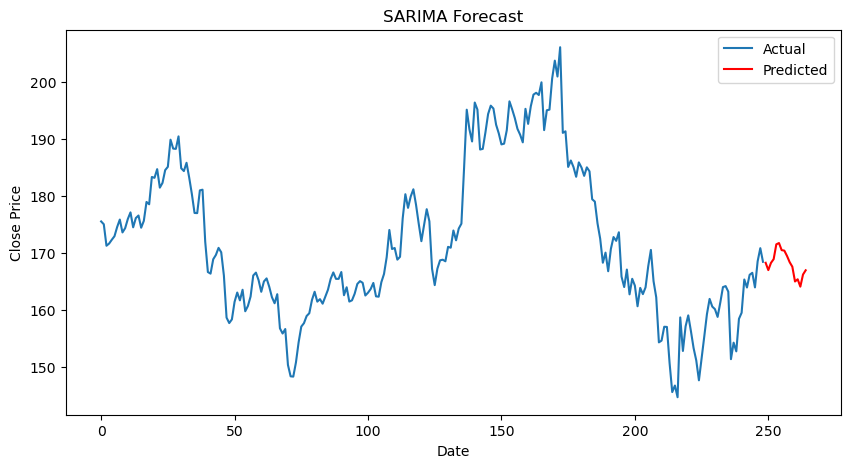

In [23]:
predictions = results.predict(start=len(df['Close']),
                             end=len(df['Close']) + 15,
                             dynamic=False
                             )
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Hyperparamter tuning

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.54263D+00    |proj g|=  8.46345D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.463D-07   6.543D+00
  F =   6.5426282353096976     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46333D+00    |proj g|=  3.09899D-01

At iterate    5    f=  3.42622D+00    |proj g|=  1.27885D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     10      1     0     0   4.960D-06   3.426D+00
  F =   3.4262239080196277     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.59244D+00    |proj g|=  7.29394D-01

At iterate   10    f=  3.59108D+00    |proj g|=  1.06655D-02

At iterate   15    f=  3.59096D+00    |proj g|=  1.41254D-01

At iterate   20    f=  3.59062D+00    |proj g|=  1.26195D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   3.629D-05   3.591D+00
  F =   3.5906234879051566     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.42684D+00    |proj g|=  1.07872D-02

At iterate   10    f=  3.42643D+00    |proj g|=  8.69106D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   2.412D-06   3.426D+00
  F =   3.4260967677622989     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25497D+00    |proj g|=  7.60271D-01

At iterate    5    f=  6.15463D+00    |proj g|=  7.22753D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.91974D+00    |proj g|=  5.14547D-01

At iterate   20    f=  5.85464D+00    |proj g|=  5.57493D-02

At iterate   25    f=  5.84387D+00    |proj g|=  6.16203D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     26     47      1     0     0   5.207D-06   5.844D+00
  F =   5.8438683231343918     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.11452D+00    |proj g|=  8.13539D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.26101D+00    |proj g|=  1.95019D-01

At iterate   10    f=  3.21739D+00    |proj g|=  3.30416D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     13      1     0     0   6.684D-06   3.217D+00
  F =   3.2173879892407653     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13402D+00    |proj g|=  2.86379D-01

At iterate    5    f=  3.09804D+00    |proj g|=  9.50202D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  4.33706D+00    |proj g|=  5.33976D+00

At iterate   20    f=  3.39211D+00    |proj g|=  4.50033D+00

At iterate   25    f=  3.22003D+00    |proj g|=  4.56109D-01

At iterate   30    f=  3.20290D+00    |proj g|=  2.26237D-01

At iterate   35    f=  3.19691D+00    |proj g|=  2.72555D-02

At iterate   40    f=  3.19501D+00    |proj g|=  1.13758D-02

At iterate   45    f=  3.19500D+00    |proj g|=  4.49074D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     90      1     1     0   4.491D-05   3.195D+00
  F =   3.1949992890671561     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.04062D+00    |proj g|=  3.05401D-03

At iterate   15    f=  3.04058D+00    |proj g|=  1.23294D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   3.471D-06   3.041D+00
  F =   3.0405792129535985     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62399D+00    |proj g|=  2.33961D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.43208D+00    |proj g|=  2.26161D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   2.262D-06   2.432D+00
  F =   2.4320770863935910     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52167D+00    |proj g|=  4.60196D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   2.349D-06   2.429D+00
  F =   2.4286390409254421     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.61290D+00    |proj g|=  3.52340D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.41795D+00    |proj g|=  3.42473D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   3.875D-06   2.418D+00
  F =   2.4179216834255293     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52180D+00    |proj g|=  6.63504D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.54033D+00    |proj g|=  2.60459D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   3.041D-06   2.540D+00
  F =   2.5403123561607819     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50447D+00    |proj g|=  8.16023D-02

At iterate    5    f=  2.41727D+00    |proj g|=  2.64633D-02


 This problem is unconstrained.



At iterate   10    f=  2.41610D+00    |proj g|=  9.53371D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   9.534D-07   2.416D+00
  F =   2.4161048450004214     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.63246D+00    |proj g|=  1.28052D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   2.281D-05   2.842D+00
  F =   2.8419138852076489     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59866D+00    |proj g|=  2.70212D-01

At iterate    5    f=  2.49124D+00    |proj g|=  8.23824D-02

At iterate   10    f=  2.43442D+00    |proj g|=  5.98763D-03

At iterate   15    f=  2.43419D+00    |proj g|=  1.60354D-04

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.53484D+00    |proj g|=  6.68796D-02

At iterate   15    f=  2.53008D+00    |proj g|=  4.62917D-01

At iterate   20    f=  2.52727D+00    |proj g|=  4.93176D-02

At iterate   25    f=  2.52124D+00    |proj g|=  4.38776D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     34      1     0     0   2.812D-05   2.521D+00
  F =   2.5212435656347618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59901D+00    |proj g|=  2.65725D-01

At iterate    5    f=  2.50123D+00    |proj g|=  7.90470D-02

At iterate   10    f=  2.43351D+00    |proj g|=  1.09883D-02

At iterate   15    f=  2.43331D+00    |proj g|=  1.17457D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     17      1     0     0   1.175D-06   2.433D+00
  F =   2.4333132454006687     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     75      2     0     0   4.715D-04   2.513D+00
  F =   2.5126037701930848     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83079D+00    |proj g|=  2.70781D-03

At iterate    5    f=  2.83078D+00    |proj g|=  4.94516D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.54406D+00    |proj g|=  1.39309D+00

At iterate   10    f=  2.52531D+00    |proj g|=  2.13646D-02

At iterate   15    f=  2.52443D+00    |proj g|=  9.72860D-01

At iterate   20    f=  2.52372D+00    |proj g|=  4.70192D-02

At iterate   25    f=  2.52235D+00    |proj g|=  4.05081D-01

At iterate   30    f=  2.51751D+00    |proj g|=  1.92920D-01

At iterate   35    f=  2.51214D+00    |proj g|=  1.55233D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     50      1     0     0   1.723D-04   2.512D+00
  F =   2.5121438615966110     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58981D+00    |proj g|=  2.58848D-01

At iterate    5    f=  2.49163D+00    |proj g|=  7.86553D-02

At iterate   10    f=  2.42409D+00    |proj g|=  3.03907D-02

At iterate   15    f=  2.42351D+00    |proj g|=  5.58296D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   1.056D-05   2.424D+00
  F =   2.4235111024442384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.43205D+00    |proj g|=  8.68637D-03

At iterate   10    f=  2.43198D+00    |proj g|=  1.46535D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     17      1     0     0   2.421D-05   2.432D+00
  F =   2.4319757497527812     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51284D+00    |proj g|=  9.59997D-03

At iterate    5    f=  2.51255D+00    |proj g|=  2.19353D-06

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.51257D+00    |proj g|=  4.34863D-03

At iterate   10    f=  2.51228D+00    |proj g|=  3.85008D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   3.850D-06   2.512D+00
  F =   2.5122826512449210     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56276D+00    |proj g|=  5.88016D-02

At iterate    5    f=  2.53094D+00    |proj g|=  9.03984D-04

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.42890D+00    |proj g|=  1.80163D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   1.082D-05   2.428D+00
  F =   2.4284743851075654     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.21625D+00    |proj g|=  1.98224D-01

At iterate    5    f=  3.14633D+00    |proj g|=  2.89455D-01

At iterate   10    f=  2.61293D+00    |proj g|=  1.83771D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.90793D+00    |proj g|=  9.13196D-01

At iterate   10    f=  2.50420D+00    |proj g|=  2.17038D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     26      1     0     0   1.300D-05   2.504D+00
  F =   2.5040667138251997     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87921D+00    |proj g|=  3.22478D-01

At iterate    5    f=  2.99197D+00    |proj g|=  2.96910D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  2.41969D+00    |proj g|=  1.98316D-02

At iterate   15    f=  2.41821D+00    |proj g|=  1.15890D-02

At iterate   20    f=  2.41805D+00    |proj g|=  1.43559D-03

At iterate   25    f=  2.41804D+00    |proj g|=  6.15493D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     39      1     0     0   1.360D-06   2.418D+00
  F =   2.4180405120470159     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   35    f=  2.51261D+00    |proj g|=  3.22360D-03

At iterate   40    f=  2.51260D+00    |proj g|=  2.18660D-03

At iterate   45    f=  2.51259D+00    |proj g|=  5.38396D-03

At iterate   50    f=  2.51258D+00    |proj g|=  2.87537D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     73      1     0     0   2.875D-03   2.513D+00
  F =   2.5125845427687197     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  2.50444D+00    |proj g|=  5.33827D-02

At iterate   15    f=  2.50356D+00    |proj g|=  1.25276D-03

At iterate   20    f=  2.50352D+00    |proj g|=  9.07492D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     36      1     0     0   2.251D-05   2.504D+00
  F =   2.5035228212282510     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54916D+00    |proj g|=  2.09596D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  2.53200D+00    |proj g|=  4.74607D-02

At iterate   15    f=  2.53020D+00    |proj g|=  7.40466D-02

At iterate   20    f=  2.52987D+00    |proj g|=  1.08516D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     34      1     0     0   1.185D-05   2.530D+00
  F =   2.5298676081879705     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48588D+00    |proj g|=  1.69801D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  2.41619D+00    |proj g|=  1.16349D-02

At iterate   15    f=  2.41613D+00    |proj g|=  3.50322D-04

At iterate   20    f=  2.41596D+00    |proj g|=  1.19844D-02

At iterate   25    f=  2.41570D+00    |proj g|=  3.49265D-04

At iterate   30    f=  2.41570D+00    |proj g|=  3.91065D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     44      1     0     0   3.911D-07   2.416D+00
  F =   2.4156957768893323     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Best SARIMA(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:1210.1249983459136
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


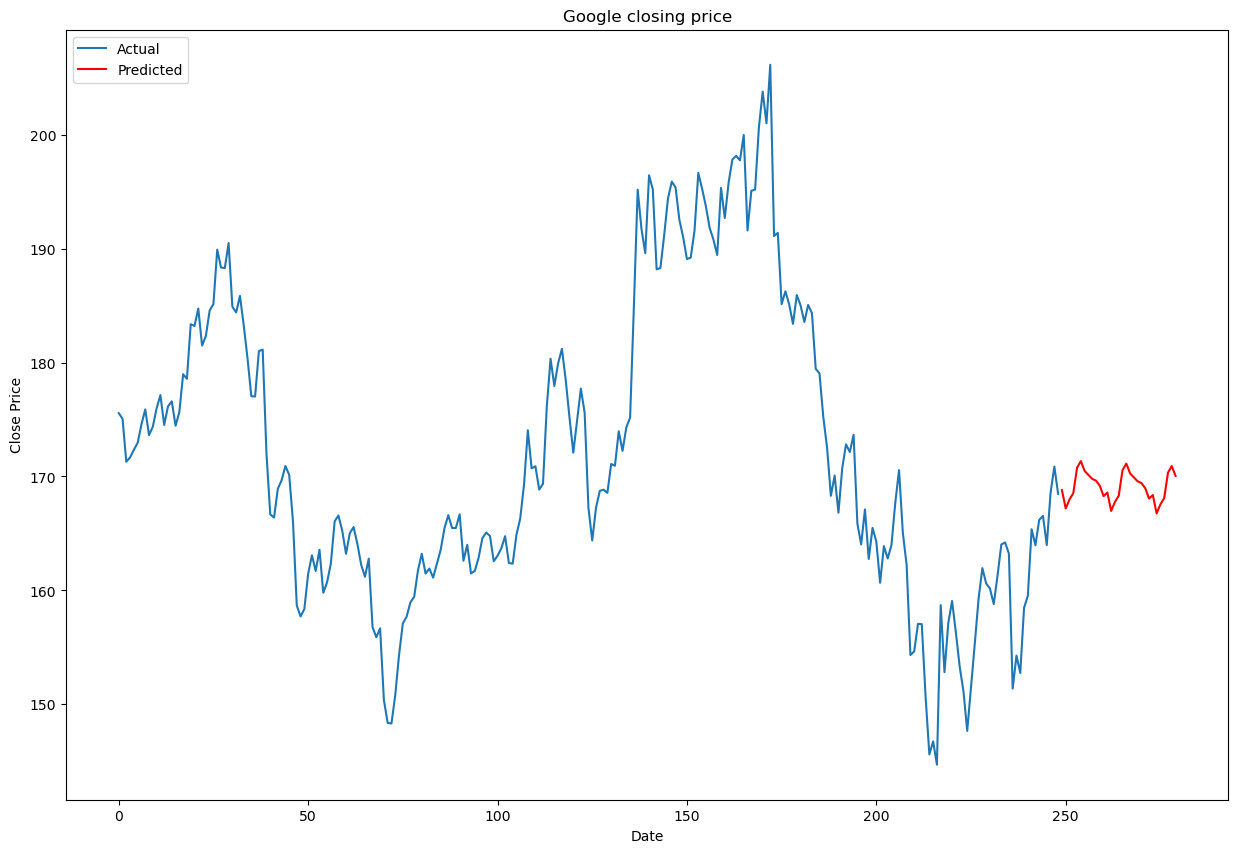

In [45]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

# Assume you have a DataFrame 'df' with your time series data in a column named 'value'
# Assume that the seasonal period of your time series data is 12 (e.g., monthly data)

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q and m quadruplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(df['Close'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMA{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

# predict next 30 days
model = SARIMAX(df['Close'],
                order = best_pdq,
                seasonal_order = best_seasonal_pdq,
                enforce_stationarity=False,
                enforce_invertibility=False)
model = model.fit()
predictions = model.predict(len(df['Close']), len(df['Close'])+30)
# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()